In [1]:
import json
import pandas as pd
import sys
import io
import os

In [2]:
if "JAVA_HOME" not in os.environ:
    os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
if "SCALA_HOME" not in os.environ:
    os.environ["SCALA_HOME"] = "/usr/local/share/scala"
if "SPARK_HOME" not in os.environ:
    os.environ["SPARK_HOME"] = "/data/DSTeam/tmp/spark-3.2.4-bin-hadoop3.2-scala2.13"
if 'PYSPARK_PYTHON' not in os.environ:
    os.environ['PYSPARK_PYTHON'] = "python3.8"
    # os.environ['PYSPARK_PYTHON'] = "/data/DSTeam/tmp/pyspark/bin/python"
    # os.environ['PYSPARK_PYTHON'] = "/usr/bin/python3.6"
# if 'PYSPARK_DRIVER_PYTHON' not in os.environ:
#     os.environ['PYSPARK_DRIVER_PYTHON'] = "/usr/bin/python3.6"



sys.path.append(os.environ["SPARK_HOME"] + "/python/lib/pyspark.zip")
sys.path.append(os.environ["SPARK_HOME"] + "/python/lib/py4j-0.10.9.5-src.zip")
sys.path.append('../')


In [3]:
import pyspark
from pyspark.sql import SparkSession
import  pyspark.sql.functions as F
import pyspark.sql.types as T
from pyspark.sql.window import Window
import pandas as pd
from importlib import reload
import matplotlib.pyplot as plt

In [5]:

spark=SparkSession.builder.appName('txn analysis')\
    .config("spark.master", 'spark://10.23.5.36:7077')\
    .config("spark.cores.max", '16')\
    .config("spark.driver.memory", '16g')\
    .config("spark.executor.memory", '12gb')\
    .config("spark.sql.caseSensitive", "false")\
    .config("spark.sql.repl.eagerEval.enabled", "true")\
    .config("spark.sql.repl.eagerEval.maxNumRows", "5")\
    .config("spark.blockManager.port", '40000')\
    .config("spark.driver.port", '40000')\
    .getOrCreate()

In [6]:
df=spark.read.json('/data/locnt1/tmp/frames_visual_full.json')

23/08/30 23:28:20 WARN DomainSocketFactory: The short-circuit local reads feature cannot be used because libhadoop cannot be loaded.
23/08/30 23:32:06 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [6]:
df.count()

972309

In [7]:
df.cache()

_id,imgfeatures,picName,video_id
{609fbf59f2d7215a...,{{3.5319037851877...,0BVPs22v2kg__vide...,0BVPs22v2kg
{609fbf59f2d7215a...,{{3.1007817597128...,BE_hHopKqQ8__vide...,BE_hHopKqQ8
{609fbf59f2d7215a...,{{2.1347944857552...,0BVPs22v2kg__vide...,0BVPs22v2kg
{609fbf59f2d7215a...,{{4.9442154704593...,BNOsuTAEkQM__vide...,BNOsuTAEkQM
{609fbf59f2d7215a...,{{1.9822784815914...,0BVPs22v2kg__vide...,0BVPs22v2kg


In [50]:
num_secs=df.groupBy('video_id').agg(
    F.count_distinct('_id').alias('num_sample')
).select('num_sample').toPandas()

In [53]:
num_secs.describe(percentiles=[.5,.9,.95,.99])

,num_sample
count,1406.000000
mean,691.542674
std,690.045869
min,15.000000
50%,611.000000
90%,1159.500000
95%,1434.750000
99%,2115.550000
max,12836.000000


In [129]:
import statsmodels.api as sm
from sklearn.preprocessing import Normalizer
import pylab 
import numpy as np
import scipy.stats as stats


In [109]:
norm=Normalizer()

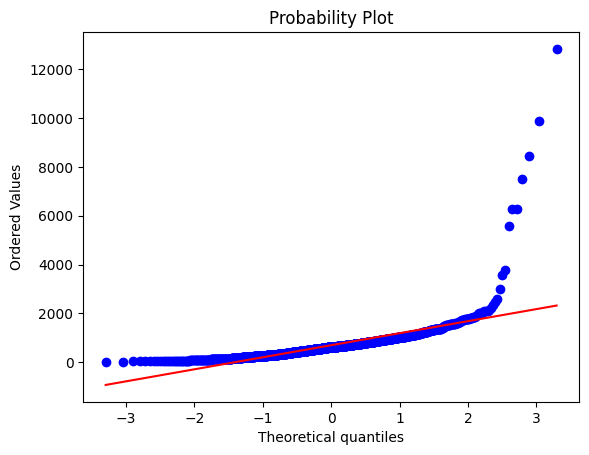

23/08/15 11:08:22 ERROR TaskSchedulerImpl: Lost executor 2 on 10.23.5.103: Remote RPC client disassociated. Likely due to containers exceeding thresholds, or network issues. Check driver logs for WARN messages.
23/08/15 11:08:23 ERROR TaskSchedulerImpl: Lost executor 3 on 10.23.5.102: Remote RPC client disassociated. Likely due to containers exceeding thresholds, or network issues. Check driver logs for WARN messages.
23/08/15 11:08:24 ERROR StandaloneSchedulerBackend: Application has been killed. Reason: Master removed our application: KILLED
23/08/15 11:08:24 WARN BlockManagerMasterEndpoint: No more replicas available for rdd_14_184 !
23/08/15 11:08:24 WARN BlockManagerMasterEndpoint: No more replicas available for rdd_14_84 !
23/08/15 11:08:24 WARN BlockManagerMasterEndpoint: No more replicas available for rdd_14_472 !
23/08/15 11:08:24 WARN BlockManagerMasterEndpoint: No more replicas available for rdd_14_125 !
23/08/15 11:08:24 WARN BlockManagerMasterEndpoint: No more replicas ava

In [130]:
stats.probplot(np.array(num_secs.num_sample), dist="norm", plot=pylab)
pylab.show()


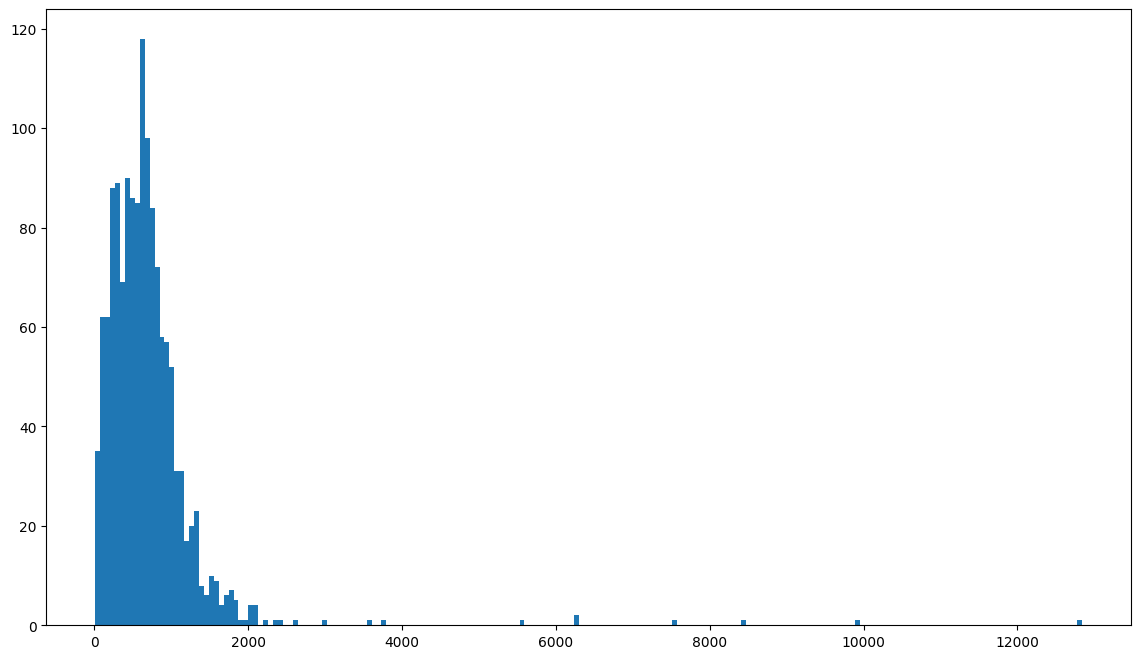

In [101]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.hist(num_secs,bins=200);

In [46]:
df.groupBy('video_id').agg(
    F.count_distinct('_id').alias('num_sample')
)

video_id,num_sample
1ngOrZ7XsKY,976
4L8DoyCYzx4,1035
3HPDFU8YfmU,271
7XFZQPIa7H4,980
Fy5z_S5B3m4,245


In [10]:
video_ids=df.select('video_id').drop_duplicates().toPandas()

In [23]:
prev_videos=[]
with open('../data/raw_url.txt') as f:
    for line in f:
        prev_videos.append(line[:-1])


In [25]:
prev_videos

['https://www.youtube.com/watch?v=5gNWD_PBYT4',
 'https://www.youtube.com/watch?v=3T3ukdjmT7Q',
 'https://www.youtube.com/watch?v=NHABrYnyvLE',
 'https://www.youtube.com/watch?v=5yTo1djFL4Q',
 'https://www.youtube.com/watch?v=JJoJkmhY9g4',
 'https://www.youtube.com/watch?v=TB9KNrlRtpU',
 'https://www.youtube.com/watch?v=GL3mfWvsF24',
 'https://www.youtube.com/watch?v=Bz2HCHcf2z8',
 'https://www.youtube.com/watch?v=saTGjVdVYpU',
 'https://www.youtube.com/watch?v=F15RijUo1_U',
 'https://www.youtube.com/watch?v=-ShNuJOAYSA',
 'https://www.youtube.com/watch?v=cW3MFYE32tI',
 'https://www.youtube.com/watch?v=BFNV5eoiKQw',
 'https://www.youtube.com/watch?v=G5eaR8DwH6Q',
 'https://www.youtube.com/watch?v=CN3amREEDag',
 'https://www.youtube.com/watch?v=lvijxvkZ2aQ',
 'https://www.youtube.com/watch?v=csRA2o0G3mg',
 'https://www.youtube.com/watch?v=qSD3Qe3ieds',
 'https://www.youtube.com/watch?v=l5H6jl_g2XE',
 'https://www.youtube.com/watch?v=u6odA-_jAgk',
 'https://www.youtube.com/watch?v=O5G7nc

In [30]:
video_ids=video_ids.video_id.tolist()

In [31]:
new_video_url=list(map (lambda x:'https://www.youtube.com/watch?v='+x,video_ids))


In [33]:
diff=set(new_video_url).difference(set(prev_videos))

In [35]:
len(diff)

1293

In [41]:
with open('../data/prev_url.txt','w') as f:
    for x in diff:
        f.write(x)
        f.write('\n')


In [5]:
df=spark.read.json('/data/DSTeam/tmp/frames_visual_extracted (2).json')

23/08/05 22:24:24 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [57]:
df.select('imgfeatures.*')

classify,places,scene,true_color
{3.53190378518775...,"{[no horizon, enc...",{static/947265a7-...,"{0, 0, 0, 0, 1062..."
{3.10078175971284...,"{[no horizon, enc...",{static/e21f57f0-...,"{0, 102, 38, 476,..."
{2.13479448575526...,"{[no horizon, man...",{static/f2937c57-...,"{2, 0, 0, 0, 0, 4..."
{4.94421547045931...,"{[natural light, ...",{static/f98f4e1c-...,"{9, 70, 14, 194, ..."
{1.98227848159149...,"{[no horizon, enc...",{static/139ca038-...,"{0, 0, 0, 0, 873,..."


In [66]:
df.select('imgfeatures.classify.*')

"Afghan hound, Afghan","African chameleon, Chamaeleo chamaeleon","African crocodile, Nile crocodile, Crocodylus niloticus","African elephant, Loxodonta africana","African grey, African gray, Psittacus erithacus","African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus","Airedale, Airedale terrier","American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier","American alligator, Alligator mississipiensis","American black bear, black bear, Ursus americanus, Euarctos americanus","American chameleon, anole, Anolis carolinensis","American coot, marsh hen, mud hen, water hen, Fulica americana","American egret, great white heron, Egretta albus","American lobster, Northern lobster, Maine lobster, Homarus americanus","Angora, Angora rabbit",Appenzeller,"Arabian camel, dromedary, Camelus dromedarius","Arctic fox, white fox, Alopex lagopus",Australian terrier,Band Aid,Bedlington terrier,Bernese mountain dog,Blenheim spaniel,Border collie,Border terrier,"Boston bull, Boston terrier","Bouvier des Flandres, Bouviers des Flandres",Brabancon griffon,Brittany spaniel,CD player,"Cardigan, Cardigan Welsh corgi",Chesapeake Bay retriever,Chihuahua,Christmas stocking,Crock Pot,"Dandie Dinmont, Dandie Dinmont terrier","Doberman, Doberman pinscher","Dungeness crab, Cancer magister",Dutch oven,Egyptian cat,English foxhound,English setter,"English springer, English springer spaniel",EntleBucher,"Eskimo dog, husky","European fire salamander, Salamandra salamandra","European gallinule, Porphyrio porphyrio",French bulldog,"French horn, horn",French loaf,"German shepherd, German shepherd dog, German police dog, alsatian",German short-haired pointer,"Gila monster, Heloderma suspectum",Gordon setter,Granny Smith,Great Dane,Great Pyrenees,Greater Swiss Mountain dog,"Ibizan hound, Ibizan Podenco","Indian cobra, Naja naja","Indian elephant, Elephas maximus","Irish setter, red setter",Irish terrier,Irish water spaniel,Irish wolfhound,Italian greyhound,Japanese spaniel,Kerry blue terrier,"Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoensis",Labrador retriever,Lakeland terrier,Leonberg,"Lhasa, Lhasa apso",Loafer,"Madagascar cat, ring-tailed lemur, Lemur catta","Maltese dog, Maltese terrier, Maltese",Mexican hairless,Model T,"Newfoundland, Newfoundland dog",Norfolk terrier,"Norwegian elkhound, elkhound",Norwich terrier,"Old English sheepdog, bobtail","Pekinese, Pekingese, Peke","Pembroke, Pembroke Welsh corgi",Persian cat,Petri dish,"Polaroid camera, Polaroid Land camera",Pomeranian,Rhodesian ridgeback,Rottweiler,"Saint Bernard, St Bernard","Saluki, gazelle hound","Samoyed, Samoyede","Scotch terrier, Scottish terrier, Scottie","Scottish deerhound, deerhound","Sealyham terrier, Sealyham","Shetland sheepdog, Shetland sheep dog, Shetland",Shih-Tzu,"Siamese cat, Siamese",Siberian husky,"Staffordshire bullterrier, Staffordshire bull terrier",Sussex spaniel,Tibetan mastiff,"Tibetan terrier, chrysanthemum dog","Walker hound, Walker foxhound",Weimaraner,Welsh springer spaniel,West Highland white terrier,Windsor tie,Yorkshire terrier,abacus,abaya,"academic gown, academic robe, judge's robe","accordion, piano accordion, squeeze box",acorn,acorn squash,acoustic guitar,admiral,"affenpinscher, monkey pinscher, monkey dog",agama,agaric,"aircraft carrier, carrier, flattop, attack aircraft carrier",airliner,"airship, dirigible","albatross, mollymawk",alligator lizard,alp,altar,ambulance,"amphibian, amphibious vehicle",analog clock,anemone fish,"ant, emmet, pismire","apiary, bee house",apron,armadillo,"artichoke, globe artichoke","ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin","assault rifle, assault gun","axolotl, mud puppy, Ambystoma mexicanum",baboon,"backpack, back pack, knapsack, packsack, rucksack, haversack",badger,"bagel, beigel","bakery, bakeshop, bakehouse","balance beam, beam","bald eagle, American eagle, Haliaeetus leucocephalus",balloon,"bal

In [83]:
df.select('imgfeatures.places.attributes').show(2,truncate=False,vertical=True)

-RECORD 0-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [89]:
df.select('imgfeatures.places.categories.*')

airfield,airplane_cabin,airport_terminal,alcove,alley,amphitheater,amusement_arcade,amusement_park,apartment_building/outdoor,aquarium,aqueduct,arcade,arch,archaelogical_excavation,archive,arena/hockey,arena/performance,arena/rodeo,army_base,art_gallery,art_school,art_studio,artists_loft,assembly_line,athletic_field/outdoor,atrium/public,attic,auditorium,auto_factory,auto_showroom,badlands,bakery/shop,balcony/exterior,balcony/interior,ball_pit,ballroom,bamboo_forest,bank_vault,banquet_hall,bar,barn,barndoor,baseball_field,basement,basketball_court/indoor,bathroom,bazaar/indoor,bazaar/outdoor,beach,beach_house,beauty_salon,bedchamber,bedroom,beer_garden,beer_hall,berth,biology_laboratory,boardwalk,boat_deck,boathouse,bookstore,booth/indoor,botanical_garden,bow_window/indoor,bowling_alley,boxing_ring,bridge,building_facade,bullring,burial_chamber,bus_interior,bus_station/indoor,butchers_shop,butte,cabin/outdoor,cafeteria,campsite,campus,canal/natural,canal/urban,candy_store,canyon,car_interior,carrousel,castle,catacomb,cemetery,chalet,chemistry_lab,childs_room,church/indoor,church/outdoor,classroom,clean_room,cliff,closet,clothing_store,coast,cockpit,coffee_shop,computer_room,conference_center,conference_room,construction_site,corn_field,corral,corridor,cottage,courthouse,courtyard,creek,crevasse,crosswalk,dam,delicatessen,department_store,desert/sand,desert/vegetation,desert_road,diner/outdoor,dining_hall,dining_room,discotheque,doorway/outdoor,dorm_room,downtown,dressing_room,driveway,drugstore,elevator/door,elevator_lobby,elevator_shaft,embassy,engine_room,entrance_hall,escalator/indoor,excavation,fabric_store,farm,fastfood_restaurant,field/cultivated,field/wild,field_road,fire_escape,fire_station,fishpond,flea_market/indoor,florist_shop/indoor,food_court,football_field,forest/broadleaf,forest_path,forest_road,formal_garden,fountain,galley,garage/indoor,garage/outdoor,gas_station,gazebo/exterior,general_store/indoor,general_store/outdoor,gift_shop,glacier,golf_course,greenhouse/indoor,greenhouse/outdoor,grotto,gymnasium/indoor,hangar/indoor,hangar/outdoor,harbor,hardware_store,hayfield,heliport,highway,home_office,home_theater,hospital,hospital_room,hot_spring,hotel/outdoor,hotel_room,house,hunting_lodge/outdoor,ice_cream_parlor,ice_floe,ice_shelf,ice_skating_rink/indoor,ice_skating_rink/outdoor,iceberg,igloo,industrial_area,inn/outdoor,islet,jacuzzi/indoor,jail_cell,japanese_garden,jewelry_shop,junkyard,kasbah,kennel/outdoor,kindergarden_classroom,kitchen,lagoon,lake/natural,landfill,landing_deck,laundromat,lawn,lecture_room,legislative_chamber,library/indoor,library/outdoor,lighthouse,living_room,loading_dock,lobby,lock_chamber,locker_room,mansion,manufactured_home,market/indoor,market/outdoor,marsh,martial_arts_gym,mausoleum,medina,mezzanine,moat/water,mosque/outdoor,motel,mountain,mountain_path,mountain_snowy,movie_theater/indoor,museum/indoor,museum/outdoor,music_studio,natural_history_museum,nursery,nursing_home,oast_house,ocean,office,office_building,office_cubicles,oilrig,operating_room,orchard,orchestra_pit,pagoda,palace,pantry,park,parking_garage/indoor,parking_garage/outdoor,parking_lot,pasture,patio,pavilion,pet_shop,pharmacy,phone_booth,physics_laboratory,picnic_area,pier,pizzeria,playground,playroom,plaza,pond,porch,promenade,pub/indoor,racecourse,raceway,raft,railroad_track,rainforest,reception,recreation_room,repair_shop,residential_neighborhood,restaurant,restaurant_kitchen,restaurant_patio,rice_paddy,river,rock_arch,roof_garden,rope_bridge,ruin,runway,sandbox,sauna,schoolhouse,science_museum,server_room,shed,shoe_shop,shopfront,shopping_mall/indoor,shower,ski_resort,ski_slope,sky,skyscraper,slum,snowfield,soccer_field,stable,stadium/baseball,stadium/football,stadium/soccer,stage/indoor,stage/outdoor,staircase,storage_room,street,subway_station/platform,supermarket,sushi_bar,swamp,swimming_hole,swimming_pool/indoor,swimming_pool/outdoor,synagogue/outdoor,television_room,television_studio,temple/asia,throne_ro

In [92]:
df.select('imgfeatures.places.*')

attributes,categories,environment
"[no horizon, encl...",{1.99999994947575...,indoor
"[no horizon, encl...","{0.0, 3.000000142...",indoor
"[no horizon, man-...",{1.40000003739260...,outdoor
"[natural light, n...",{1.99999994947575...,outdoor
"[no horizon, encl...",{9.99999974737875...,indoor


In [14]:
df.select(
    '_id','imgfeatures.*','picName','video_id'
)

_id,classify,places,scene,true_color,picName,video_id
{609fbf59f2d7215a...,{2.13479448575526...,"{[no horizon, man...",{static/f2937c57-...,"{2, 0, 0, 0, 0, 4...",0BVPs22v2kg__vide...,0BVPs22v2kg
{609fbf59f2d7215a...,{1.98227848159149...,"{[no horizon, enc...",{static/139ca038-...,"{0, 0, 0, 0, 873,...",0BVPs22v2kg__vide...,0BVPs22v2kg
{609fbf59f2d7215a...,{3.53190378518775...,"{[no horizon, enc...",{static/947265a7-...,"{0, 0, 0, 0, 1062...",0BVPs22v2kg__vide...,0BVPs22v2kg
{609fbf59f2d7215a...,{4.01910045184195...,"{[no horizon, man...",{static/408ab972-...,"{0, 0, 0, 0, 0, 9...",0BVPs22v2kg__vide...,0BVPs22v2kg
{609fbf59f2d7215a...,{1.29152671433985...,"{[enclosed area, ...",{static/fc2d9e4f-...,"{0, 0, 0, 0, 1158...",0BVPs22v2kg__vide...,0BVPs22v2kg


In [16]:
df.select('imgfeatures.scene.*')

image,scene
static/f2937c57-2...,"{0.0, 0.0, 0.0, 0..."
static/139ca038-3...,"{0.0, 0.0, 0.0, 0..."
static/947265a7-b...,"{0.0, 0.0, 0.0, 0..."
static/408ab972-5...,"{0.0, 0.0, 0.0, 0..."
static/fc2d9e4f-0...,"{0.0, 0.0, 0.0, 0..."


In [44]:

import torch
from torch.autograd import Variable as V
import torchvision.models as models
from torchvision import transforms as trn
from torch.nn import functional as F
import os
from PIL import Image


# th architecture to use
arch = 'resnet18'

# # load the pre-trained weights
# model_file = '%s_places365.pth.tar' % arch
# if not os.access(model_file, os.W_OK):
#     weight_url = 'http://places2.csail.mit.edu/models_places365/' + model_file
#     os.system('wget ' + weight_url)

# model = models.__dict__[arch](num_classes=365)
# checkpoint = torch.load(model_file, map_location=lambda storage, loc: storage)
# state_dict = {str.replace(k,'module.',''): v for k,v in checkpoint['state_dict'].items()}
# model.load_state_dict(state_dict)
# model.eval()


In [2]:
sys.path.append('..')

In [2]:
# # load the pre-trained weights
# model_file = '../models/resnet18_places365.pth.tar'
# if not os.access(model_file, os.W_OK):
#     weight_url = 'http://places2.csail.mit.edu/models_places365/' + model_file
#     os.system('wget ' + weight_url)

# model = models.__dict__[arch](num_classes=365)
# checkpoint = torch.load(model_file, map_location=lambda storage, loc: storage)
# state_dict = {str.replace(k,'module.',''): v for k,v in checkpoint['state_dict'].items()}
# model.load_state_dict(state_dict)
# model.eval()

In [3]:
centre_crop = trn.Compose([
        trn.Resize((256,256)),
        trn.CenterCrop(224),
        trn.ToTensor(),
        trn.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


In [45]:
# file_name = 'categories_places365.txt'
# if not os.access(file_name, os.W_OK):
#     synset_url = 'https://raw.githubusercontent.com/csailvision/places365/master/categories_places365.txt'
#     os.system('wget ' + synset_url)
classes = list()
with open("../models/model_metadata/places365/categories_places365.txt") as class_file:
    for line in class_file:
        classes.append(line.strip().split(' ')[0][3:])
classes = tuple(classes)


# load the test image
img_name = '../data/images/7JJfJgyHYwU/frame_24.jpg'
# if not os.access(img_name, os.W_OK):
#     img_url = 'http://places.csail.mit.edu/demo/' + img_name
#     os.system('wget ' + img_url)

img = Image.open(img_name)
input_img = V(centre_crop(img).unsqueeze(0))

# forward pass
logit = model.forward(input_img)
h_x = F.softmax(logit, 1).data.squeeze()
probs, idx = h_x.sort(0, True)

print('{} prediction on {}'.format(arch,img_name))
# output the prediction
for i in range(0, 5):
    print('{:.3f} -> {}'.format(probs[i], classes[idx[i]]))

NameError: name 'centre_crop' is not defined

In [7]:
import sys
sys.path.append('../')

## Places 365

In [56]:

 # hacky way to deal with the Pytorch 1.0 update
def recursion_change_bn(module):
    if isinstance(module, torch.nn.BatchNorm2d):
        module.track_running_stats = 1
    else:
        for i, (name, module1) in enumerate(module._modules.items()):
            module1 = recursion_change_bn(module1)
    return module

def load_labels():
    # prepare all the labels
    # scene category relevant
    file_name_category = '../models/model_metadata/places365/categories_places365.txt'
    # if not os.access(file_name_category, os.W_OK):
    #     synset_url = 'https://raw.githubusercontent.com/csailvision/places365/master/categories_places365.txt'
    #     os.system('wget ' + synset_url)
    classes = list()
    with open(file_name_category) as class_file:
        for line in class_file:
            classes.append(line.strip().split(' ')[0][3:])
    classes = tuple(classes)

    # indoor and outdoor relevant
    file_name_IO = '../models/model_metadata/places365/IO_places365.txt'
    # if not os.access(file_name_IO, os.W_OK):
    #     synset_url = 'https://raw.githubusercontent.com/csailvision/places365/master/IO_places365.txt'
    #     os.system('wget ' + synset_url)
    with open(file_name_IO) as f:
        lines = f.readlines()
        labels_IO = []
        for line in lines:
            items = line.rstrip().split()
            labels_IO.append(int(items[-1]) -1) # 0 is indoor, 1 is outdoor
    labels_IO = np.array(labels_IO)

    # scene attribute relevant
    file_name_attribute = '../models/model_metadata/places365/labels_sunattribute.txt'
    # if not os.access(file_name_attribute, os.W_OK):
    #     synset_url = 'https://raw.githubusercontent.com/csailvision/places365/master/labels_sunattribute.txt'
    #     os.system('wget ' + synset_url)
    with open(file_name_attribute) as f:
        lines = f.readlines()
        labels_attribute = [item.rstrip() for item in lines]
    file_name_W = '../models/model_metadata/places365/W_sceneattribute_wideresnet18.npy'
    # if not os.access(file_name_W, os.W_OK):
    #     synset_url = 'http://places2.csail.mit.edu/models_places365/W_sceneattribute_wideresnet18.npy'
    #     os.system('wget ' + synset_url)
    W_attribute = np.load(file_name_W)

    return classes, labels_IO, labels_attribute, W_attribute

def hook_feature(module, input, output):
    features_blobs.append(np.squeeze(output.data.cpu().numpy()))

def returnCAM(feature_conv, weight_softmax, class_idx):
    # generate the class activation maps upsample to 256x256
    size_upsample = (256, 256)
    nc, h, w = feature_conv.shape
    output_cam = []
    for idx in class_idx:
        cam = weight_softmax[class_idx].dot(feature_conv.reshape((nc, h*w)))
        cam = cam.reshape(h, w)
        cam = cam - np.min(cam)
        cam_img = cam / np.max(cam)
        cam_img = np.uint8(255 * cam_img)
        output_cam.append(cv2.resize(cam_img, size_upsample))
    return output_cam

def returnTF():
# load the image transformer
    tf = trn.Compose([
        trn.Resize((224,224)),
        trn.ToTensor(),
        trn.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    return tf


def load_model():
    # this model has a last conv feature map as 14x14

    model_file = '../models/places365/wideresnet18_places365.pth.tar'
    # if not os.access(model_file, os.W_OK):
        # os.system('wget http://places2.csail.mit.edu/models_places365/' + model_file)
        # os.system('wget https://raw.githubusercontent.com/csailvision/places365/master/wideresnet.py')

    from src.feature_extraction.places365 import wideresnet
    model = wideresnet.resnet18(num_classes=365)
    checkpoint = torch.load(model_file, map_location=lambda storage, loc: storage)
    state_dict = {str.replace(k,'module.',''): v for k,v in checkpoint['state_dict'].items()}
    model.load_state_dict(state_dict)

    
    # hacky way to deal with the upgraded batchnorm2D and avgpool layers...
    for i, (name, module) in enumerate(model._modules.items()):
        module = recursion_change_bn(model)
    model.avgpool = torch.nn.AvgPool2d(kernel_size=14, stride=1, padding=0)
    
    model.eval()



    # the following is deprecated, everything is migrated to python36

    ## if you encounter the UnicodeDecodeError when use python3 to load the model, add the following line will fix it. Thanks to @soravux
    #from functools import partial
    #import pickle
    #pickle.load = partial(pickle.load, encoding="latin1")
    #pickle.Unpickler = partial(pickle.Unpickler, encoding="latin1")
    #model = torch.load(model_file, map_location=lambda storage, loc: storage, pickle_module=pickle)

    model.eval()
    # hook the feature extractor
    features_names = ['layer4','avgpool'] # this is the last conv layer of the resnet
    for name in features_names:
        model._modules.get(name).register_forward_hook(hook_feature)
    return model



In [14]:
# from src.video_preprocessor.feature_extraction import wideresnet
# model = wideresnet.resnet18(pretrained=True,model_dir=model_file)

In [47]:
model_file = '../models/places365/wideresnet18_places365.pth.tar'

In [17]:
# model = wideresnet.resnet18(pretrained=True,model_dir=model_file)

In [48]:
import torch

In [49]:
import numpy as np
import cv2

In [55]:
reload(src.feature_extraction.places365)

NameError: name 'src' is not defined

In [57]:

# load the labels
classes, labels_IO, labels_attribute, W_attribute = load_labels()

# load the model

features_blobs = []
model = load_model()

# load the transformer
tf = returnTF() # image transformer

# get the softmax weight
params = list(model.parameters())
weight_softmax = params[-2].data.numpy()
weight_softmax[weight_softmax<0] = 0

# load the test image
# img_url = 'http://places.csail.mit.edu/demo/6.jpg'
# os.system('wget %s -q -O test.jpg' % img_url)
img = Image.open('../data/images/7JJfJgyHYwU/frame_24.jpg')
input_img = V(tf(img).unsqueeze(0))

# forward pass
logit = model.forward(input_img)
h_x = F.softmax(logit, 1).data.squeeze()
probs, idx = h_x.sort(0, True)
probs = probs.numpy()
idx = idx.numpy()

# print('RESULT ON ' + img_url)

# output the IO prediction
io_image = np.mean(labels_IO[idx[:10]]) # vote for the indoor or outdoor
if io_image < 0.5:
    print('--TYPE OF ENVIRONMENT: indoor')
else:
    print('--TYPE OF ENVIRONMENT: outdoor')

# output the prediction of scene category
print('--SCENE CATEGORIES:')
for i in range(0, 5):
    print('{:.3f} -> {}'.format(probs[i], classes[idx[i]]))

# output the scene attributes
responses_attribute = W_attribute.dot(features_blobs[1])
idx_a = np.argsort(responses_attribute)
print('--SCENE ATTRIBUTES:')
print(', '.join([labels_attribute[idx_a[i]] for i in range(-1,-10,-1)]))


# # generate class activation mapping
# print('Class activation map is saved as cam.jpg')
# CAMs = returnCAM(features_blobs[0], weight_softmax, [idx[0]])

# # render the CAM and output
# img = cv2.imread('../data/images/7JJfJgyHYwU/frame_24.jpg')
# height, width, _ = img.shape
# heatmap = cv2.applyColorMap(cv2.resize(CAMs[0],(width, height)), cv2.COLORMAP_JET)
# result = heatmap * 0.4 + img * 0.5
# cv2.imwrite('cam.jpg', result)

--TYPE OF ENVIRONMENT: indoor
--SCENE CATEGORIES:
0.966 -> boxing_ring
0.013 -> martial_arts_gym
0.002 -> volleyball_court/outdoor
0.002 -> orchestra_pit
0.001 -> arena/performance
--SCENE ATTRIBUTES:
enclosed area, no horizon, man-made, indoor lighting, competing, cloth, metal, railing, sports
Class activation map is saved as cam.jpg


True

In [59]:
responses_attribute.shape

(102,)

## Scence150

In [1]:
import sys
sys.path.append('../')

In [4]:
from importlib import reload

In [3]:
from src.feature_extraction import scenes150

/data/DSTeam/locnt1/personal/thesis/env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:
reload(scenes150)

<module 'src.feature_extraction.scenes150' from '/data/DSTeam/locnt1/personal/thesis/notebooks/../src/feature_extraction/scenes150/__init__.py'>

In [14]:
cuda=False

In [37]:
model=scenes150.init_module(model_path='../models/scenes150/')

Loading weights for net_encoder
Loading weights for net_decoder


In [42]:
scenes150.extract_scences_150_reset50(model,"/data/DSTeam/locnt1/personal/thesis/data/images/7JJfJgyHYwU/frame_24.jpg")

2023-09-07 22:53:38.713 | INFO     | src.feature_extraction.scenes150:extract_scences_150_reset50:69 - torch.Size([1, 720, 1280])


921600.0
921600


{0: 0.5536924913194444,
 2: 9.765625e-06,
 3: 0.059967447916666666,
 4: 3.363715277777778e-05,
 5: 0.003938802083333333,
 6: 8.680555555555556e-05,
 12: 0.14920464409722223,
 13: 0.00013780381944444444,
 15: 0.005070529513888889,
 19: 8.463541666666667e-05,
 21: 0.03420464409722222,
 26: 0.028115234375,
 38: 0.016258680555555554,
 46: 0.003285590277777778,
 53: 0.009917534722222222,
 69: 7.921006944444444e-05,
 76: 0.0006304253472222222,
 77: 0.0018174913194444445,
 82: 0.00171875,
 94: 0.01796657986111111,
 95: 0.014800347222222222,
 101: 0.09897894965277777}

In [2]:
from src.feature_extraction import places365

/data/DSTeam/locnt1/personal/thesis/env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
reload(places365)

<module 'src.feature_extraction.places365' from '/data/DSTeam/locnt1/personal/thesis/notebooks/../src/feature_extraction/places365/__init__.py'>

In [3]:
args=places365.init_module('../models/model_metadata/places365')

In [11]:
features_blobs=[]

In [13]:
global features_blobs

In [4]:
places365.extract_feature("/data/DSTeam/locnt1/personal/thesis/data/images/7JJfJgyHYwU/frame_48.jpg",*args)

2023-09-08 00:53:57.589 | INFO     | src.feature_extraction.places365:extract_feature:103 - --TYPE OF ENVIRONMENT: indoor
2023-09-08 00:53:57.591 | INFO     | src.feature_extraction.places365:extract_feature:108 - --SCENE CATEGORIES:
2023-09-08 00:53:57.591 | INFO     | src.feature_extraction.places365:extract_feature:110 - 0.565 -> stage/indoor
2023-09-08 00:53:57.592 | INFO     | src.feature_extraction.places365:extract_feature:110 - 0.120 -> music_studio
2023-09-08 00:53:57.592 | INFO     | src.feature_extraction.places365:extract_feature:110 - 0.056 -> discotheque
2023-09-08 00:53:57.593 | INFO     | src.feature_extraction.places365:extract_feature:110 - 0.044 -> orchestra_pit
2023-09-08 00:53:57.593 | INFO     | src.feature_extraction.places365:extract_feature:110 - 0.033 -> television_studio


(0.0,
 [0.5654565691947937,
  0.12033388018608093,
  0.05579371377825737,
  0.04423978924751282,
  0.03261832147836685,
  0.03118637576699257,
  0.025023065507411957,
  0.015930403023958206,
  0.010265900753438473,
  0.00909669790416956,
  0.00827804859727621,
  0.004515842068940401,
  0.004431207198649645,
  0.004247791133821011,
  0.004152563866227865,
  0.0035798209719359875,
  0.0034926384687423706,
  0.0030571497045457363,
  0.0030113793909549713,
  0.0026133419014513493,
  0.0025843565817922354,
  0.0023630301002413034,
  0.002304921392351389,
  0.0018962823087349534,
  0.0015897847479209304,
  0.0014045450370758772,
  0.0013655413640663028,
  0.0012910210061818361,
  0.0012136275181546807,
  0.0009872703813016415,
  0.0008951989584602416,
  0.0008850459125824273,
  0.0008838402573019266,
  0.0008615105180069804,
  0.0008472700137645006,
  0.0008286559022963047,
  0.0007718263659626245,
  0.0007407604134641588,
  0.0006923418841324747,
  0.000657714088447392,
  0.0006431178189814